## Pandas, Matplotlib 임포트

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## train.csv, test.csv 불러오기

In [2]:
train_df = pd.read_csv('dataset/titanic/train.csv')
test_df = pd.read_csv('dataset/titanic/test.csv')

## train 데이터와 test 데이터 확인

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 사용하지 않을 데이터 drop

In [7]:
train_df.drop(['PassengerId', 'Ticket', 'Cabin', 'Name'], axis=1, inplace=True)
test_df.drop(['PassengerId', 'Ticket', 'Cabin', 'Name'], axis=1, inplace=True)

## train 데이터의 결측치 처리

In [8]:
train_df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [9]:
# train_df['Embarked']의 가장 많은 값을 넣기
train_df['Embarked'].fillna('S', inplace=True)

In [10]:
# Age 처리
train_mm = float(round(train_df.loc[train_df['Sex'] == 'male', 'Age'].mean()))
train_fm = float(round(train_df.loc[train_df['Sex'] == 'female', 'Age'].mean()))
test_mm = float(round(test_df.loc[test_df['Sex'] == 'male', 'Age'].mean()))
test_fm = float(round(test_df.loc[test_df['Sex'] == 'female', 'Age'].mean()))

In [11]:
train_df.loc[(train_df['Sex'] == 'male') & (train_df['Age'].isnull() == True), 'Age'] = train_mm
train_df.loc[(train_df['Sex'] == 'female') & (train_df['Age'].isnull() == True), 'Age'] = train_fm
test_df.loc[(test_df['Sex'] == 'male') & (test_df['Age'].isnull() == True), 'Age'] = test_mm
test_df.loc[(test_df['Sex'] == 'female') & (test_df['Age'].isnull() == True), 'Age'] = test_fm

In [22]:
# test 데이터의 fare 결측치 처리
test_df['Fare'].fillna(test_df['Fare'].mean(), inplace=True)

## train_df, test_df의 텍스트 데이터 수치화

In [14]:
# 성별 수치화   0 = male, 1 = female
train_df['Sex'] = train_df['Sex'].apply(lambda x:0 if x == 'male' else 1)
test_df['Sex'] = test_df['Sex'].apply(lambda x:0 if x == 'male' else 1)

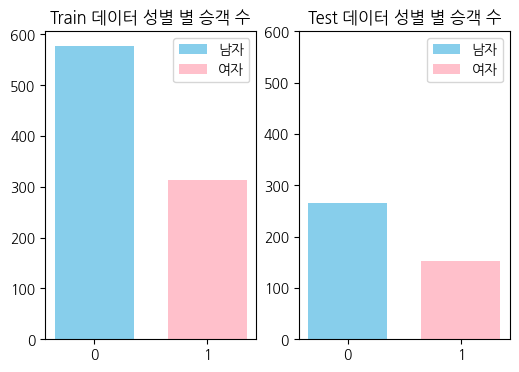

In [15]:
plt.figure(figsize=(6, 4))
plt.subplot(1, 2, 1)
plt.title('Train 데이터 성별 별 승객 수')
train_bar_sex = plt.bar(train_df['Sex'].value_counts().index, train_df['Sex'].value_counts(), width=.7, color=['Skyblue', 'Pink'])
plt.xticks(list(i for i in range(2)))
plt.yticks(list(i for i in range(0, 700, 100)))
plt.legend(handles = train_bar_sex, labels=['남자', '여자'])
plt.subplot(1, 2, 2)
plt.title('Test 데이터 성별 별 승객 수')
test_bar_sex = plt.bar(test_df['Sex'].value_counts().index, test_df['Sex'].value_counts(), width=.7, color=['Skyblue', 'Pink'])
plt.xticks(list(i for i in range(2)))
plt.yticks(list(i for i in range(0, 700, 100)))
plt.legend(handles = test_bar_sex, labels=['남자', '여자'])
plt.show()

In [16]:
# Embarked 수치화   0 = S, 1 = C, 2 = Q
train_df['Embarked'] = train_df['Embarked'].apply(lambda x:0 if x == 'S' else (1 if x == 'C' else 2))
test_df['Embarked'] = test_df['Embarked'].apply(lambda x:0 if x == 'S' else (1 if x == 'C' else 2))

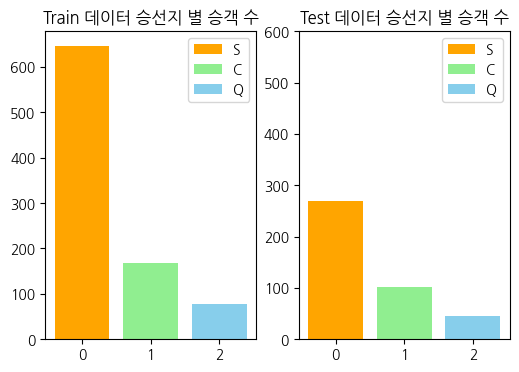

In [17]:
plt.figure(figsize=(6, 4))
plt.subplot(1, 2, 1)
plt.title('Train 데이터 승선지 별 승객 수')
train_bar_embarked = plt.bar(train_df['Embarked'].value_counts().index, train_df['Embarked'].value_counts(), color=['orange', 'lightGreen', 'skyblue'])
plt.xticks(list(i for i in range(3)))
plt.yticks(list(i for i in range(0, 700, 100)))
plt.legend(handles = train_bar_embarked, labels=['S', 'C', 'Q'])
plt.subplot(1, 2, 2)
plt.title('Test 데이터 승선지 별 승객 수')
test_bar_embarked = plt.bar(test_df['Embarked'].value_counts().index, test_df['Embarked'].value_counts(), color=['orange', 'lightGreen', 'skyblue'])
plt.xticks(list(i for i in range(3)))
plt.yticks(list(i for i in range(0, 700, 100)))
plt.legend(handles = test_bar_embarked, labels=['S', 'C', 'Q'])
plt.show()

## Age 나이대 별 그룹으로 정리

In [18]:
# 1 = 0~19, 2 = 20~29, 3 = 30~39, 4 = 40~49, 5 = 50~59, 6 = 60+
def set_Age(age):
    if age >= 60:
        return 6
    elif age >= 50:
        return 5
    elif age >= 40:
        return 4
    elif age >= 30:
        return 3
    elif age >= 20:
        return 2
    else:
        return 1
    
train_df['Age'] = train_df['Age'].apply(set_Age)
test_df['Age'] = test_df['Age'].apply(set_Age)

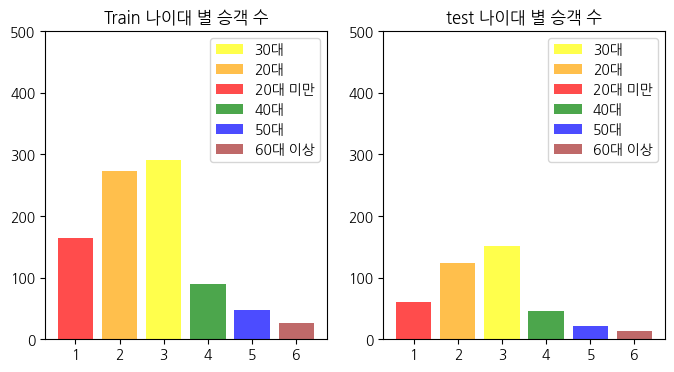

In [19]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title('Train 나이대 별 승객 수')
train_bar_age = plt.bar(train_df['Age'].value_counts().index, train_df['Age'].value_counts(), 
                        color=['yellow', 'orange', 'red', 'green', 'blue', 'brown'], alpha=0.7)
plt.xticks(list(i for i in range(1, 7)))
plt.yticks(list(i for i in range(0, 600, 100)))
plt.legend(handles = train_bar_age, labels=['30대', '20대', '20대 미만', '40대', '50대' ,'60대 이상'])
plt.subplot(1, 2, 2)
plt.title('test 나이대 별 승객 수')
test_bar_age = plt.bar(test_df['Age'].value_counts().index, test_df['Age'].value_counts(),
                       color=['yellow', 'orange', 'red', 'green', 'blue', 'brown'], alpha=0.7)
plt.xticks(list(i for i in range(1, 7)))
plt.yticks(list(i for i in range(0, 600, 100)))
plt.legend(handles = test_bar_age, labels=['30대', '20대', '20대 미만', '40대', '50대' ,'60대 이상'])
plt.show()

## SibSp와 Parch를 더하여 Family 생성

In [20]:
train_df['Family'] = train_df['SibSp'] + train_df['Parch']
test_df['Family'] = test_df['SibSp'] + test_df['Parch']
train_df.drop(['SibSp', 'Parch'], axis=1, inplace=True)
test_df.drop(['SibSp', 'Parch'], axis=1, inplace=True)

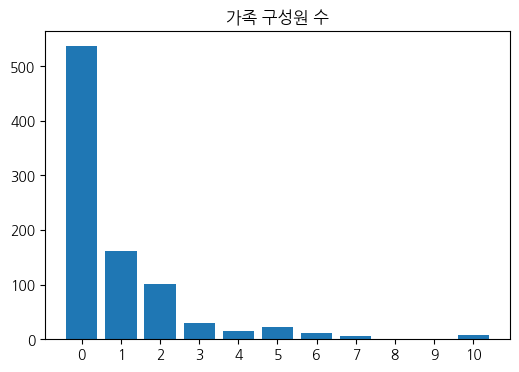

In [21]:
plt.figure(figsize=(6, 4))
plt.title('가족 구성원 수')
plt.bar(train_df['Family'].value_counts().index, train_df['Family'].value_counts())
plt.xticks(list(i for i in range(11)))
plt.show()